In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", 
              palette="Paired")
sns.set_style({"grid.color": ".8", "grid.linestyle": "--"})

In [2]:
df = pd.read_csv("../dataset/merged_cleaned.csv")

In [10]:
df.describe()

,Score,nRatings,Aged,Distilled,Price_unit
count,4592.000000,4592.000000,1716.000000,1062.000000,194.000000
mean,6.329334,22.016986,13.672494,2004.254237,97.000773
std,2.043642,94.926397,49.167791,9.462230,207.396371
min,0.000000,1.000000,0.000000,1952.000000,29.570000
25%,5.200000,1.000000,8.000000,1999.000000,44.730000
50%,6.800000,3.000000,12.000000,2005.000000,65.335000
75%,7.900000,10.000000,16.000000,2010.000000,102.855000
max,10.000000,2802.000000,2020.000000,2023.000000,2856.790000


In [7]:
# Extract numeric part from 'nRatings' and convert to int
df['nRatings'] = df['nRatings'].str.extract('(\d+)', expand=False).fillna(0).astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4592 entries, 0 to 4591
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4591 non-null   object 
 1   Company       4592 non-null   object 
 2   Distillation  693 non-null    object 
 3   ABV           3334 non-null   object 
 4   Location      4592 non-null   object 
 5   Score         4592 non-null   float64
 6   nRatings      4592 non-null   int64  
 7   Aged          1716 non-null   float64
 8   Distilled     1062 non-null   float64
 9   Type          4592 non-null   object 
 10  Full Name     194 non-null    object 
 11  Country       194 non-null    object 
 12  Price_unit    194 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 466.5+ KB


In [9]:
df.to_csv("../dataset/merged_cleaned.csv", index=False)

In [30]:
abv = df[~df['ABV'].isnull()]

In [31]:
abv.loc[:, 'ABV'] = abv['ABV'].str.rstrip('%').astype('float')

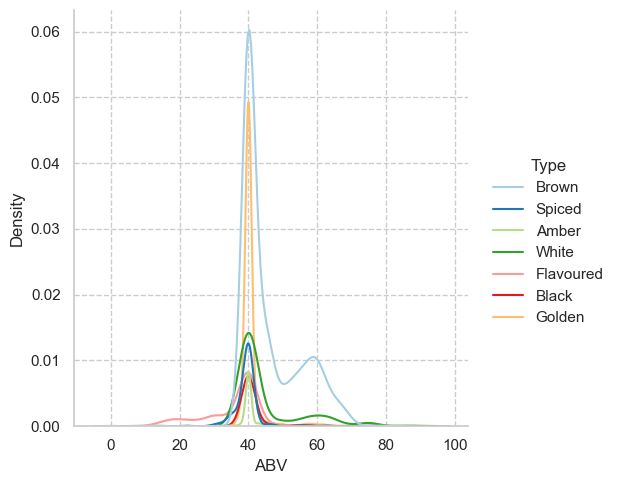

In [33]:
sns.displot(abv, x="ABV", hue="Type", kind="kde")

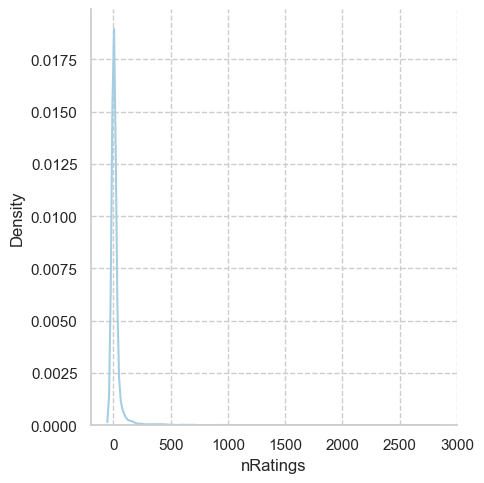

In [87]:
sns.displot(df, x="nRatings", kind="kde")

<Axes: xlabel='nRatings', ylabel='Score'>

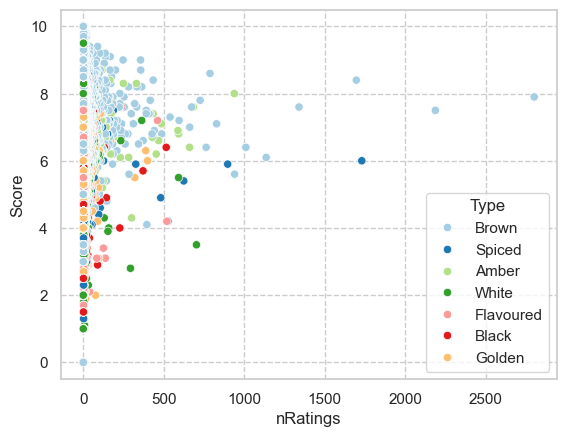

In [46]:
sns.scatterplot(data=df, x="nRatings", y="Score", hue="Type")

(0.0, 500.0)

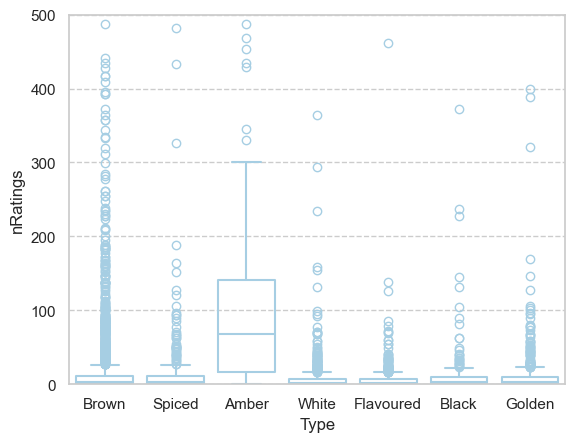

In [48]:
sns.boxplot(data=df, x="Type", y="nRatings", fill=False)
plt.ylim(0, 500)

<Axes: xlabel='Type', ylabel='Price_unit'>

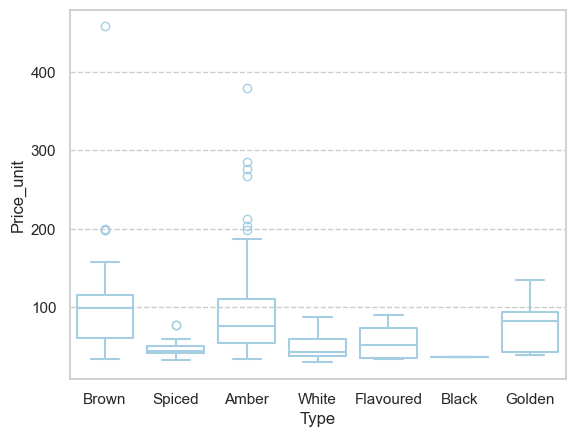

In [43]:
sns.boxplot(data=df[df["Price_unit"]<500], x="Type", y="Price_unit", fill=False)

<Axes: xlabel='Price_unit', ylabel='Score'>

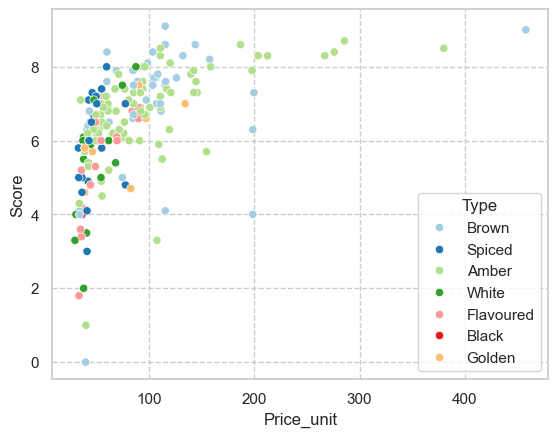

In [37]:
sns.scatterplot(data=df[df["Price_unit"]<500], x="Price_unit", y="Score", hue="Type")

In [63]:
avg_score_by_type = df.groupby('Type')['Score'].mean().sort_values(ascending=False).reset_index()
print(avg_score_by_type)

        Type     Score
0      Brown  7.257924
1      Amber  6.752874
2     Spiced  5.463112
3     Golden  5.416883
4      White  5.296569
5  Flavoured  5.095984
6      Black  5.095506


<Axes: xlabel='Type', ylabel='Score'>

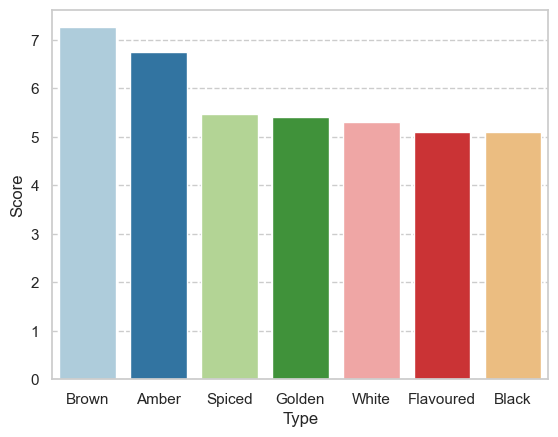

In [66]:
sns.barplot(x='Type', y='Score', data=avg_score_by_type, hue="Type")

In [49]:
df[~df['Distilled'].isnull()]

,Name,Company,Distillation,ABV,Location,Score,nRatings,Aged,Distilled,Type,Full Name,Country,Price_unit
143,2000,Diplomatico,NaN,NaN,Venezuela,9.2,137,NaN,2000.0,Brown,NaN,NaN,NaN
176,2002,Diplomatico,NaN,NaN,Venezuela,8.7,106,NaN,2002.0,Brown,NaN,NaN,NaN
184,2004 Zinfandel Cask Blend 11-Year,Foursquare,Pot and Column Still,43.0%,Barbados,8.4,102,11.0,2004.0,Brown,NaN,NaN,NaN
192,2005 Port Cask Finish 9-Year,Foursquare,Pot and Column Still,40.0%,Barbados,8.2,97,9.0,2005.0,Brown,NaN,NaN,NaN
224,2001,Diplomatico,NaN,NaN,Venezuela,8.7,85,NaN,2001.0,Brown,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584,2013 Vintages Collection No 2 Barbados 9-Year,Plantation,Pot and Column Still,50.2%,Multiple,8.0,1,9.0,2013.0,Brown,NaN,NaN,NaN
4585,2007 Madras 12-Year,Savanna,Column Still (1-4),60.3%,Reunion,9.0,1,12.0,2007.0,Brown,NaN,NaN,NaN
4586,2009 Hampden DOK 12-Year,Rumclub Private Selection,Pot Still,58.2%,Germany,9.0,1,12.0,2009.0,Brown,NaN,NaN,NaN
4588,1994 Enmore REV 27-Year,Rumclub Private Selection,Pot Still,54.5%,Germany,9.0,1,27.0,1994.0,Brown,NaN,NaN,NaN


<Axes: xlabel='Price_unit', ylabel='Score'>

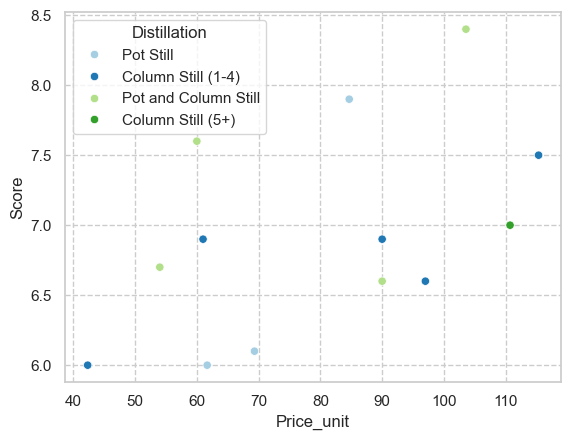

In [51]:
sns.scatterplot(data=df, x="Price_unit", y="Score", hue="Distillation")

In [69]:
df.Distilled.unique()

array([2024, 2000, 2002, 2004, 2005, 2001, 2008, 2007, 1985, 2003, 2010,
       2014, 2015, 2009, 1990, 1995, 2006, 1981, 1993, 2018, 2016, 2013,
       1996, 2019, 2011, 1998, 1988, 1999, 1980, 1994, 2017, 1952, 2020,
       1987, 1979, 2012, 1997, 1992, 1974, 1991, 1986, 1978, 1982, 1977,
       1983, 1989, 2021, 2023, 1975, 2022, 1961, 1973, 1970])

In [68]:
df['Distilled'].fillna(2024, inplace=True)
df['Distilled'] = df['Distilled'].astype(int)

In [81]:
distilled_counts = df['Distilled'].value_counts().sort_index()

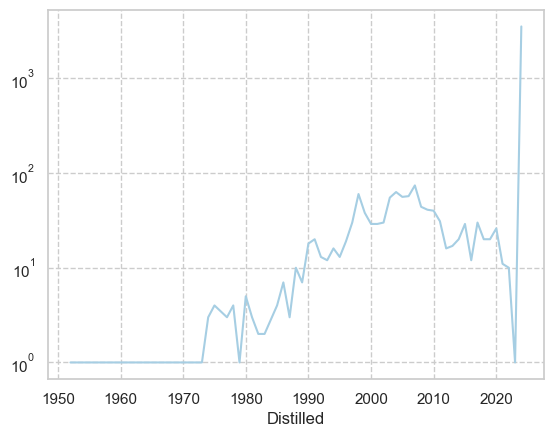

In [83]:
sns.lineplot(x=distilled_counts.index, y=distilled_counts.values)
plt.yscale('log')

<Axes: xlabel='Distilled', ylabel='Score'>

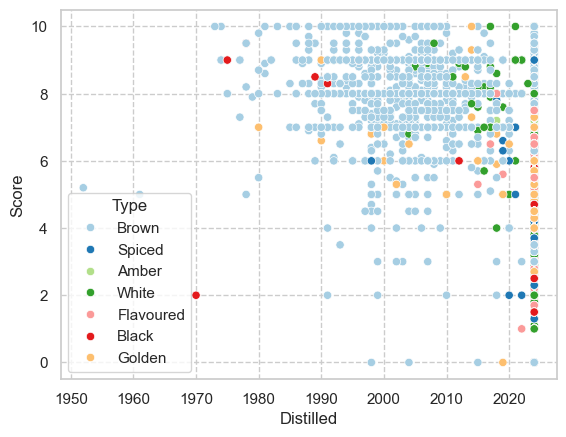

In [84]:
sns.scatterplot(data=df, x="Distilled", y="Score", hue="Type")

<Axes: xlabel='Distilled', ylabel='Price_unit'>

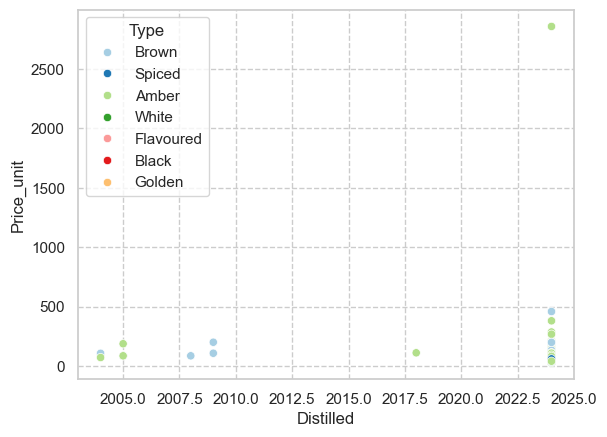

In [85]:
sns.scatterplot(data=df, x="Distilled", y="Price_unit", hue="Type")

In [89]:
df['Popularity'] = df['Score'] + np.log(df['nRatings'] + 1)

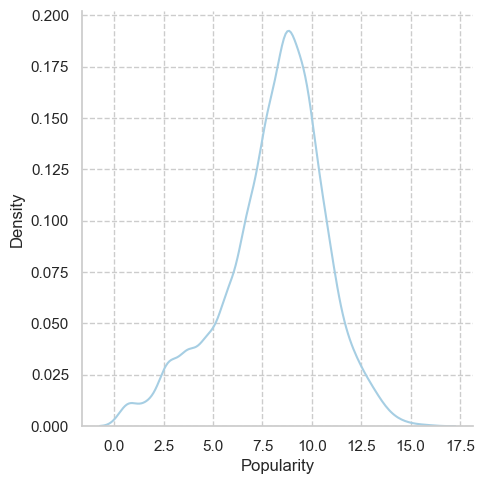

In [91]:
sns.displot(df, x="Popularity", kind="kde")

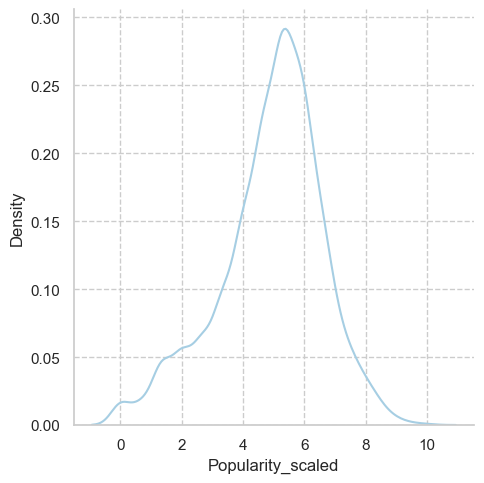

In [96]:
sns.displot(df, x="Popularity_scaled", kind="kde")

(0.0, 500.0)

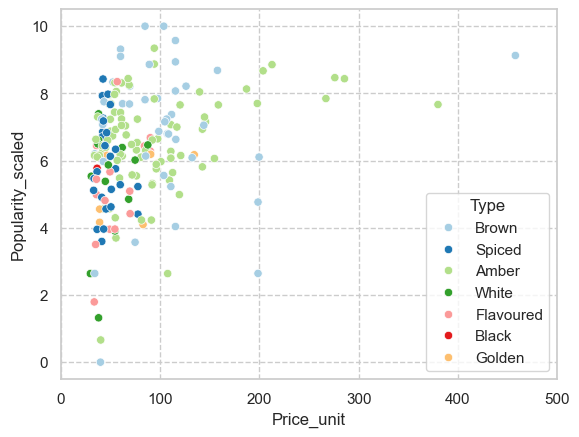

In [100]:
sns.scatterplot(data=df, x="Price_unit", y="Popularity_scaled", hue="Type")
plt.xlim(0,500)

In [101]:
min_pop = df['Popularity'].min()
max_pop = df['Popularity'].max()

df['Popularity_scaled'] = ((df['Popularity'] - min_pop) / 
                    (max_pop - min_pop)) * 10

Text(0.5, 1.0, 'Type')

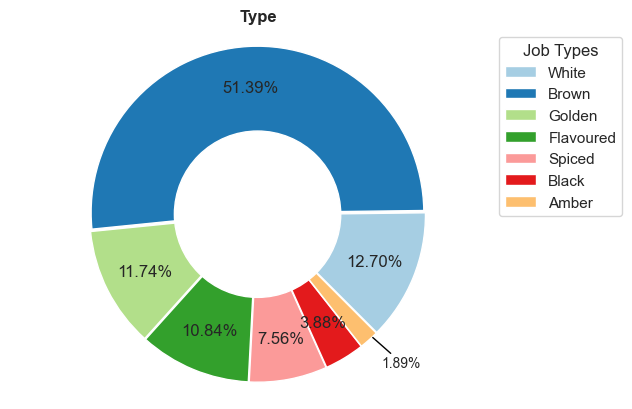

In [108]:
counts = df.Type.value_counts()

labels = list(counts.index)
sizes = counts.values
labels[0], labels[1] = labels[1], labels[0]
sizes[0], sizes[1] = sizes[1], sizes[0]

# Create the donut pie plot
fig, ax = plt.subplots()
explode = [0.01]*len(labels)
# wedgeprops = {"linewidth": 1, "width": 0.7, "edgecolor": "k"}
patches, label_text, size_text = plt.pie(sizes,
                                explode=explode,
#                                 labels=labels,
#                                 labeldistance=1.1,
                                # colors=[sns.color_palette('Set2')[i] for i in [-1,0,1,2,-2,3]],
                                autopct='%3.2f%%',
                                shadow=False,
                                startangle=-45,
                                pctdistance=0.75)

# draw the circle to make donut
circle = plt.Circle((0, 0), 0.5, fc='white')
donut = plt.gcf()
donut.gca().add_artist(circle)
# patches: pie chart，texts1: label text，texts2: pie chart text
plt.axis('equal')
plt.legend(labels, title='Job Types', loc='upper right', bbox_to_anchor=(1.25, 1))

'''Handle small piece'''
# Adjust the label position for the specific slice
angle = (patches[-1].theta2 - patches[-1].theta1) / 2. + patches[-1].theta1
x = 1.3 * patches[-1].r * np.cos(np.deg2rad(angle))
y = 1.2 * patches[-1].r * np.sin(np.deg2rad(angle))
plt.text(x, y, f'{size_text[-1].get_text()}', ha='center', va='center', fontsize=10)
# Add a line connecting the number to the slice
arrowprops = dict(arrowstyle='-', color='black')
plt.annotate('', xy=(x-0.05, y+0.05), xytext=(0.68, -0.73), arrowprops=arrowprops)
# Remove the label for the small number
size_text[-1].set_text('')

plt.title('Type', fontweight='bold')

In [120]:
df['Quebec'] = df['Price_unit'].notna()

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4592 entries, 0 to 4591
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4591 non-null   object 
 1   Company            4592 non-null   object 
 2   Distillation       693 non-null    object 
 3   ABV                3334 non-null   object 
 4   Location           4592 non-null   object 
 5   Score              4592 non-null   float64
 6   nRatings           4592 non-null   int64  
 7   Aged               1716 non-null   float64
 8   Distilled          4592 non-null   int64  
 9   Type               4592 non-null   object 
 10  Full Name          194 non-null    object 
 11  Country            194 non-null    object 
 12  Price_unit         194 non-null    float64
 13  Popularity         4592 non-null   float64
 14  Popularity_scaled  4592 non-null   float64
 15  Quebec             4592 non-null   bool   
dtypes: bool(1), float64(5), 

In [122]:
df.Quebec.sum()

194

In [123]:
df.to_csv("../dataset/merged_popularity.csv", index=False)